# EDA Rápido

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3 as sql

In [20]:
ruta_a = "../data/raw/adidas_us_sales_dataset.xlsx"

df = pd.read_excel(ruta_a, index_col=None)

# Eliminar columna de índice anterior si existe
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Guardar en SQLite
conn = sql.connect("../data/raw/adidas_sales.db")
df.to_sql("ventas_adidas", conn, if_exists="replace", index=False)

print("Base de datos creada con éxito")

cursor = conn.cursor()

Base de datos creada con éxito


# 1. Revisión Inicial del Dataset

In [21]:
# Cantidad de filas y columnas
filas_columnas = df.shape
print(f"Hay {filas_columnas[0]} filas y {filas_columnas[1]} columnas en el dataset")

Hay 9648 filas y 13 columnas en el dataset


In [22]:
# Nombres de las columnas
print("Los nombres de las columnas:")
nombres_columnas = df.columns.tolist()
for columna in nombres_columnas:
    print(columna)

Los nombres de las columnas:
Retailer
Retailer ID
Invoice Date
Region
State
City
Product
Price per Unit
Units Sold
Total Sales
Operating Profit
Operating Margin
Sales Method


In [23]:
# Tipos de datos y no nulos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [24]:
# Ejemplos de registros al inicio
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1969-12-31 19:00:43.831,Northest,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,1969-12-31 19:00:43.832,Northest,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,1969-12-31 19:00:43.833,Northest,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,1969-12-31 19:00:43.834,Northest,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,1969-12-31 19:00:43.835,Northest,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [25]:
# Ejemplos de registros al final
df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,1969-12-31 19:00:44.220,Northest,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,1969-12-31 19:00:44.220,Northest,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,1969-12-31 19:00:44.249,Northest,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,1969-12-31 19:00:44.249,Northest,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet
9647,Foot Locker,1185732,1969-12-31 19:00:44.249,Northest,New Hampshire,Manchester,Women's Street Footwear,29.0,83,2407.0,649.89,0.27,Outlet


# 2. Explorar Tipos de Datos

In [26]:
df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit             float64
Units Sold                   int64
Total Sales                float64
Operating Profit           float64
Operating Margin           float64
Sales Method                object
dtype: object

# 3. Análisis de valores nulos

In [28]:
# Cantidad de valores nulos por columna
print("Cantidad de valores nulos por columna: ")
df.isnull().sum()

Cantidad de valores nulos por columna: 


Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [29]:
# Porcentaje de valores nulos
print("Porcentaje de valores nulos: ")
df.isnull().mean()

Porcentaje de valores nulos: 


Retailer            0.0
Retailer ID         0.0
Invoice Date        0.0
Region              0.0
State               0.0
City                0.0
Product             0.0
Price per Unit      0.0
Units Sold          0.0
Total Sales         0.0
Operating Profit    0.0
Operating Margin    0.0
Sales Method        0.0
dtype: float64

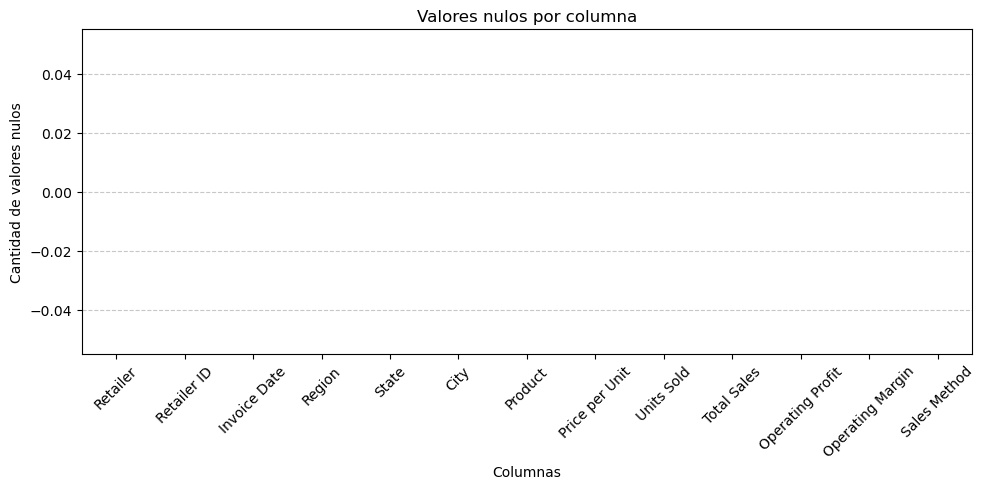

In [36]:
# Visualización de los valores nulos
nulos = df.isnull().sum()

nulos.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Valores nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores nulos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

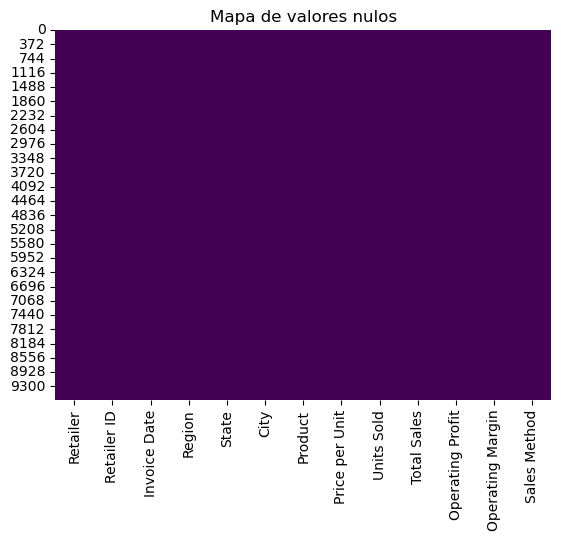

In [31]:
# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de valores nulos")
plt.show()

### En conclusión:

- No hay nulos